## 셀라늄

In [110]:
df

,word,freq
0,00시,1
1,02대구1016,1
2,02명대구63,1
3,02명인천0,1
4,02인천00092345803,1
...,...,...
352,확진환자629명전일,1
353,확진환자671명전일,1
354,확진환자92명전일,1
355,확진환자수,1


In [111]:
import os

In [112]:
os.getcwd()

'C:\\Users\\TJ\\Documents\\lecture'

In [113]:
import time

In [114]:
print('hell')
time.sleep(3)
print('o')

hell
o


In [115]:
import pandas as pd
import lxml.html
import requests

In [116]:
res = requests.get('http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=')

In [117]:
root = lxml.html.fromstring(res.text)

In [118]:
root

<Element html at 0x1dab71b5f98>

In [119]:
content = root.cssselect('[class="wrap nj"]')[0].text_content()

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [121]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  5,  2,
         2,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  1,  2,  4,
         1,  1,  2,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
         2,  2,  1,  1,  2,  4,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  1,  3,  1,  2,  1,  1,  1,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  2,  2,  1,  2,  2,  2,  2,  1,  1,  2,  1,  2,  1,  2,
         2,  2,  4,  3,  1,  3,  3,  1,  2,  1,  2,  1,  2,  2, 19,  1,
         2,  2,  4,  1,  1,  2,  2,  5,  7,  4,  2,  1,  1,  3,  1,  1,
         4,  1,  1,  1,  2,  2,  2,  1,  1,  1,  1, 17,  2,  1, 

In [122]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [123]:
df

,word,freq
0,00시,1
1,02대구1016,1
2,02명대구63,1
3,02명인천0,1
4,02인천00092345803,1
...,...,...
352,확진환자629명전일,1
353,확진환자671명전일,1
354,확진환자92명전일,1
355,확진환자수,1


In [124]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
334,확진자,36
295,증감,21
190,대비,19
279,전국대비,18
223,비율누적,18
224,비율전국대비,18
219,보건환경연구원,17
200,발생동향,7
335,확진환자,6
244,시도별,6


In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [126]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

In [131]:
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.ttf',width=400, height=400, background_color='white')

In [136]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

In [137]:
wc.fit_words(frequencies)

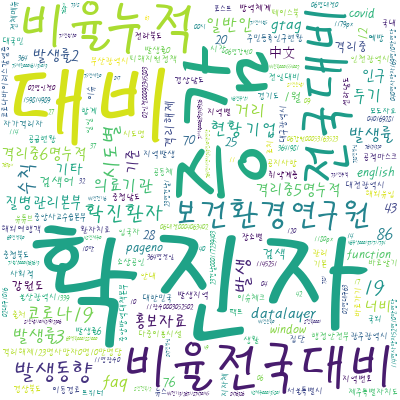

In [138]:
wc.to_image()